# Week 5

Context information: The dataset I used is the Statlog Heart Disease dataset from Kaggle, which includes 14 features related to cardiovascular health. The chosen project was based on cardiovascular disease (CVD). This project examines data related to CVD in order to analyze healthcare utilization and risk factors. The dataset, Statlog Heart Disease, included medical attributes from 270 individuals. These included blood pressure, cholesterol, and heart rate, utilizing said data to predict the presence of heart disease. The project strived to discover trends in healthcare to identify key risk factors for cardiovascular disease and thus inform on new strategies for disease prevention and management.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, roc_auc_score
)

In [2]:
df = pd.read_csv('Heart_disease_statlog.csv')

In [3]:
print("Shape:", df.shape)
display(df.head())
display(df.describe())
print("\nMissing values:\n", df.isnull().sum())
print("\nColumn names:\n", df.columns)

Shape: (270, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,3,130,322,0,2,109,0,2.4,1,3,1,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0,3,0
2,57,1,1,124,261,0,0,141,0,0.3,0,0,3,1
3,64,1,3,128,263,0,0,105,1,0.2,1,1,3,0
4,74,0,1,120,269,0,2,121,1,0.2,0,1,1,0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,2.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,0.585185,0.670370,1.822222,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,0.959140,0.497827
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,2.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,2.000000,3.000000,3.000000,1.000000



Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Column names:
 Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [4]:
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Support Vector Machines

In [15]:
#Classification Report
def svm_classification_report(model, X_test, y_test, model_name="SVM Model"):
    y_pred = model.predict(X_test)
    print(f"\n{model_name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

#Confusion Matrix
def svm_confusion_matrix(model, X_test, y_test, model_name="SVM Model"):
    y_pred = model.predict(X_test)
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix – {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

#ROC
def svm_roc_auc(model, X_test, y_test, model_name="SVM Model"):
    if hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test)
    else:
        y_scores = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    auc = roc_auc_score(y_test, y_scores)
    
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve – {model_name}")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()
    
    print(f"AUC Score: {auc:.4f}")

Linear Kernel


SVC (Linear Kernel)
Accuracy: 0.8519

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        33
           1       0.88      0.71      0.79        21

    accuracy                           0.85        54
   macro avg       0.86      0.83      0.84        54
weighted avg       0.86      0.85      0.85        54



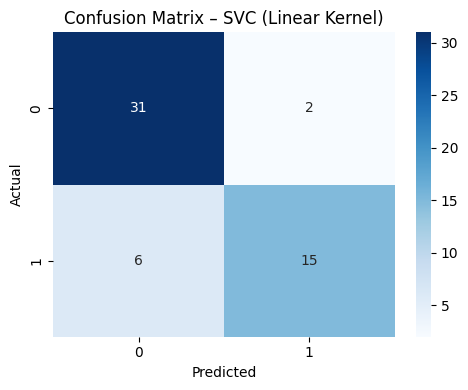

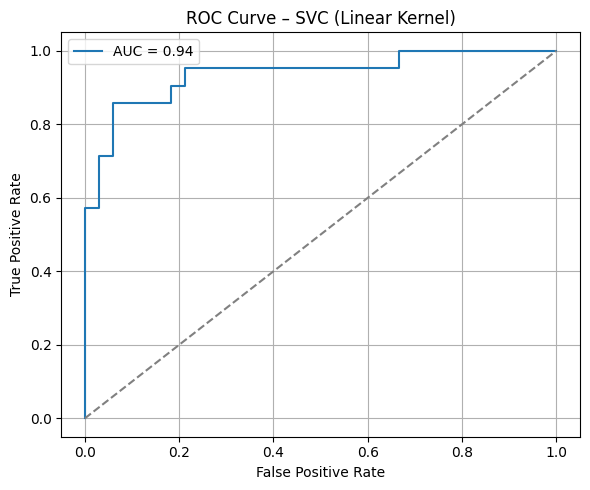

AUC Score: 0.9365


In [18]:
svc_linear = SVC(kernel='linear', C=1.0)
svc_linear.fit(X_train_scaled, y_train)

svm_classification_report(svc_linear, X_test_scaled, y_test, model_name="SVC (Linear Kernel)")
svm_confusion_matrix(svc_linear, X_test_scaled, y_test, model_name="SVC (Linear Kernel)")
svm_roc_auc(svc_linear, X_test_scaled, y_test, model_name="SVC (Linear Kernel)")

RBF Kernel


SVC (RBF Kernel)
Accuracy: 0.8704

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        33
           1       0.82      0.86      0.84        21

    accuracy                           0.87        54
   macro avg       0.86      0.87      0.86        54
weighted avg       0.87      0.87      0.87        54



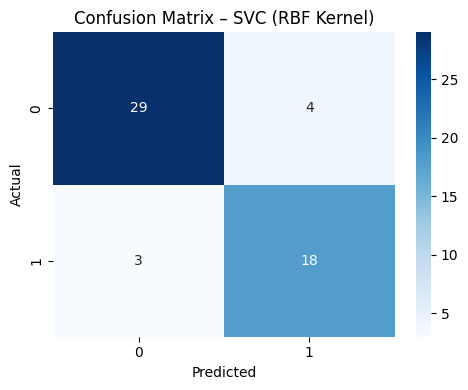

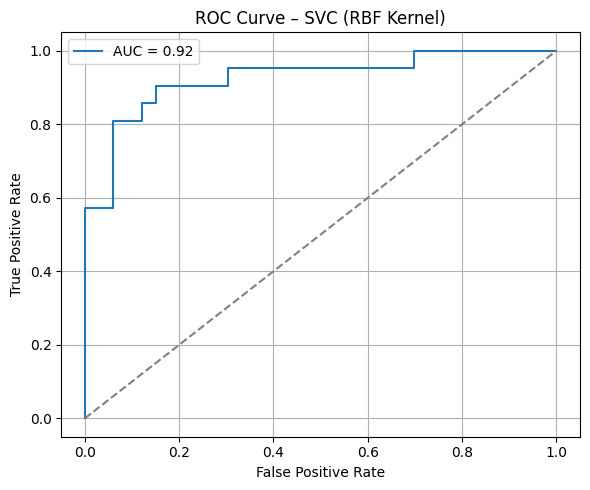

AUC Score: 0.9250


In [21]:
svc_rbf = SVC(kernel='rbf', C=1.0)
svc_rbf.fit(X_train_scaled, y_train)

svm_classification_report(svc_rbf, X_test_scaled, y_test, model_name="SVC (RBF Kernel)")
svm_confusion_matrix(svc_rbf, X_test_scaled, y_test, model_name="SVC (RBF Kernel)")
svm_roc_auc(svc_rbf, X_test_scaled, y_test, model_name="SVC (RBF Kernel)")

Polynomial Kernel


SVC (Polynomial Kernel)
Accuracy: 0.8519

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        33
           1       0.81      0.81      0.81        21

    accuracy                           0.85        54
   macro avg       0.84      0.84      0.84        54
weighted avg       0.85      0.85      0.85        54



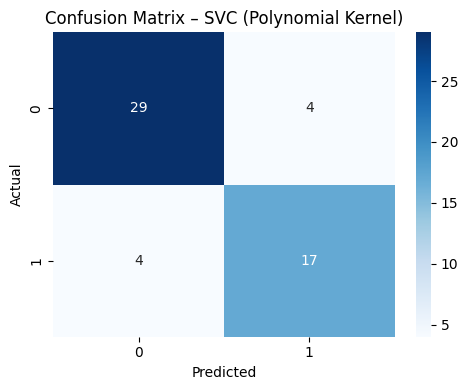

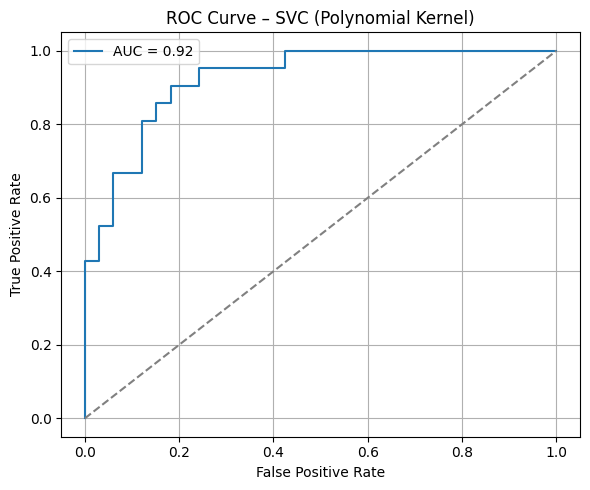

AUC Score: 0.9235


In [24]:
svc_poly = SVC(kernel='poly', degree=3, C=1.0)
svc_poly.fit(X_train_scaled, y_train)

svm_classification_report(svc_poly, X_test_scaled, y_test, model_name="SVC (Polynomial Kernel)")
svm_confusion_matrix(svc_poly, X_test_scaled, y_test, model_name="SVC (Polynomial Kernel)")
svm_roc_auc(svc_poly, X_test_scaled, y_test, model_name="SVC (Polynomial Kernel)")

Regularization for Support Vector Machine

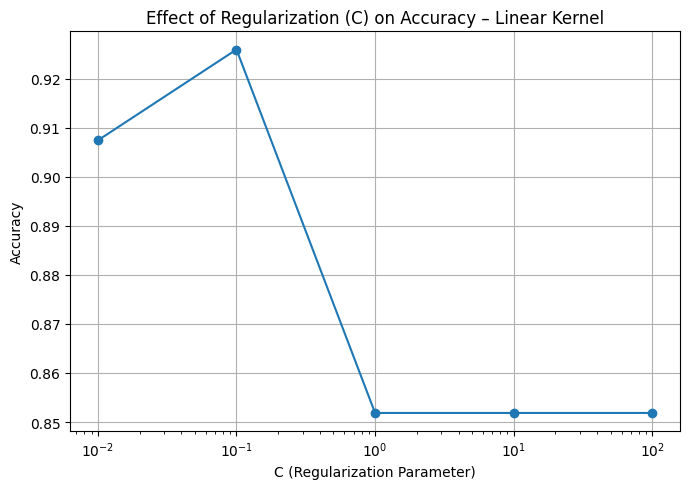

In [30]:
#C vs accuracy plot for linear kernel
C_values = [0.01, 0.1, 1, 10, 100]
linear_results = []

for c in C_values:
    svc = SVC(kernel='linear', C=c)
    svc.fit(X_train_scaled, y_train)
    y_pred = svc.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    linear_results.append((c, acc))

c_vals, acc_vals = zip(*linear_results)
plt.figure(figsize=(7, 5))
plt.plot(c_vals, acc_vals, marker='o')
plt.xscale('log')
plt.title("Effect of Regularization (C) on Accuracy – Linear Kernel")
plt.xlabel("C (Regularization Parameter)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()

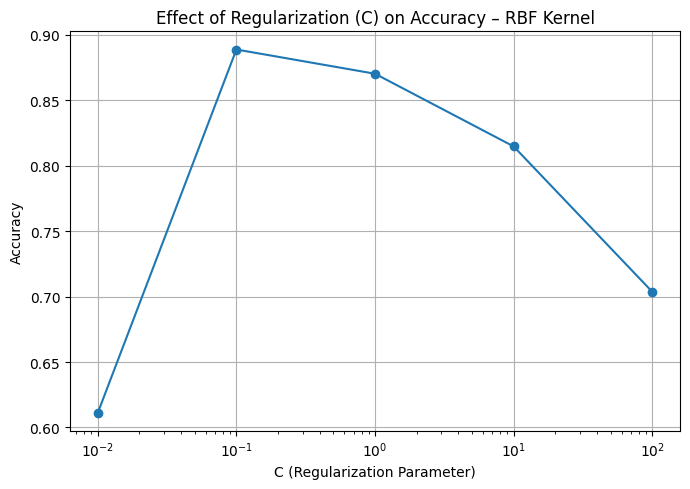

In [33]:
#C vs accuracy plot for RBF kernel
C_values = [0.01, 0.1, 1, 10, 100]
rbf_results = []

for c in C_values:
    svc = SVC(kernel='rbf', C=c)
    svc.fit(X_train_scaled, y_train)
    y_pred = svc.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    rbf_results.append((c, acc))

c_vals_rbf, acc_vals_rbf = zip(*rbf_results)
plt.figure(figsize=(7, 5))
plt.plot(c_vals_rbf, acc_vals_rbf, marker='o', label='RBF Kernel')
plt.xscale('log')
plt.title("Effect of Regularization (C) on Accuracy – RBF Kernel")
plt.xlabel("C (Regularization Parameter)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()

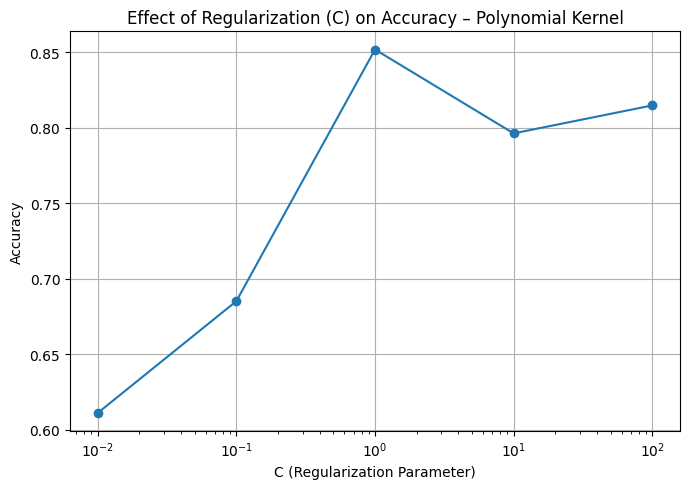

In [39]:
#C vs accuracy plot for polynomial kernel
C_values = [0.01, 0.1, 1, 10, 100]
poly_results = []

for c in C_values:
    svc = SVC(kernel='poly', degree=3, C=c)
    svc.fit(X_train_scaled, y_train)
    y_pred = svc.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    poly_results.append((c, acc))

c_vals_poly, acc_vals_poly = zip(*poly_results)
plt.figure(figsize=(7, 5))
plt.plot(c_vals_poly, acc_vals_poly, marker='o', label='Polynomial Kernel')
plt.xscale('log')
plt.title("Effect of Regularization (C) on Accuracy – Polynomial Kernel")
plt.xlabel("C (Regularization Parameter)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()